In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.


(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(iv plot) smoothing = False
(iv plot) window_length = 40
(base) Amplitude Study (7.8GHz) (low noise)
(base) loadData()


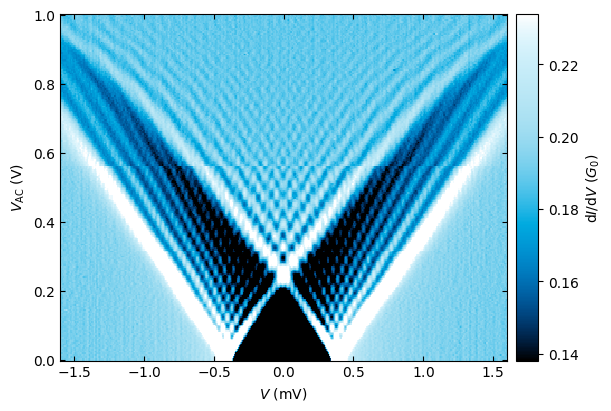

In [6]:
# Execute All low noise IVPlotting
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

eva = IVPlot()
eva.plot_ivs = True
eva.smoothing = False
eva.window_length = 40

eva.i_lim = (-33e-9, 33e-9)
eva.v_lim = (-2.25e-3, 2.25e-3)
eva.didv_lim = (0, 1.5)
eva.dvdi_lim = (0, 2e5)
eva.didv_c_lim = (None, None)

eva.didv_norm = (1e0, '')
eva.dvdi_norm = (1e3, 'k')

eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.sub_folder = "amplitude study"

eva.title = "Amplitude Study (7.8GHz) (low noise)"
eva.loadData()

eva.fig_didv_vy()
data = eva.up_sweep

In [7]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Example: create or load your colormap
cmap = cmap()  # or your own ListedColormap

# Convert to Plotly colorscale
def matplotlib_to_plotly(cmap, pl_entries=255):
    colorscale = []
    for k in range(pl_entries):
        c = cmap(k / (pl_entries - 1))  # rgba tuple
        colorscale.append([
            k / (pl_entries - 1),
            f'rgb({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)})'
        ])
    return colorscale

plotly_colorscale = matplotlib_to_plotly(cmap)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

x, y = np.meshgrid(eva.mapped["voltage_axis"], eva.mapped["y_axis"])
z = data["differential_conductance"]
df = pd.DataFrame({
    "x": x.ravel(),
    "y": y.ravel(),
    "z": data["differential_conductance"].ravel(),
})


# Create surface plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale=plotly_colorscale)])
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=700, height=700,
                  scene=dict(
                      xaxis_title='X',
                      yaxis_title='Y',
                      zaxis_title='Z'
                  ))

fig.show()

: 